<a href="https://colab.research.google.com/github/thliang01/Flowers-Recognition/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! nvidia-smi

Sat Aug 13 15:33:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
! pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.2 MB/s 
     |████████████████████████████████| 157 kB 39.7 MB/s 
     |████████████████████████████████| 181 kB 43.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 157 kB 52.1 MB/s 
     |████████████████████████████████| 157 kB 50.3 MB/s 
     |████████████████████████████████| 157 kB 53.6 MB/s 
     |████████████████████████████████| 156 kB 40.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=2b02a10f15e35a74d899b936ced12d4636564b28d77c91cf07752c87574c171a
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [5]:
! pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 4.2 MB/s 


In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import os
from fastai.vision.all import *
import numpy as np
import pandas as pd
import matplotlib as plt

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import timm

In [10]:
import wandb
wandb.login()

from fastai.callback.wandb import *

# start logging a wandb run
wandb.init(project='Flowers Recognition')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: thliang01. Use `wandb login --relogin` to force relogin


In [11]:
path = Path('drive/MyDrive/flowers')
path.ls()

(#5) [Path('drive/MyDrive/flowers/tulip'),Path('drive/MyDrive/flowers/dandelion'),Path('drive/MyDrive/flowers/sunflower'),Path('drive/MyDrive/flowers/rose'),Path('drive/MyDrive/flowers/daisy')]

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(288, method='squish')]
).dataloaders(path)

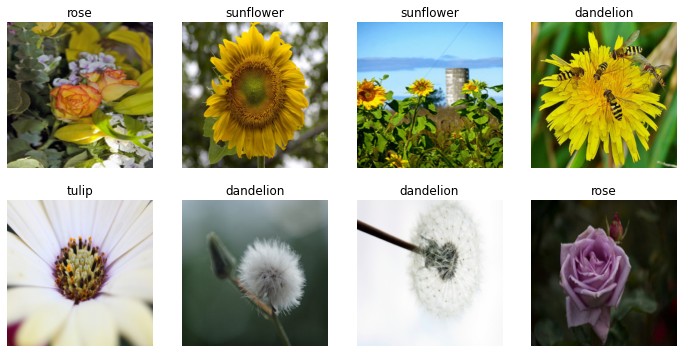

In [13]:
dls.show_batch(max_n=8)

In [14]:
timm.list_models('resnet*', pretrained=True)

['resnet10t',
 'resnet14t',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet32ts',
 'resnet33ts',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50_gn',
 'resnet50d',
 'resnet51q',
 'resnet61q',
 'resnet101',
 'resnet101d',
 'resnet152',
 'resnet152d',
 'resnet200d',
 'resnetaa50',
 'resnetblur50',
 'resnetrs50',
 'resnetrs101',
 'resnetrs152',
 'resnetrs200',
 'resnetrs270',
 'resnetrs350',
 'resnetrs420',
 'resnetv2_50',
 'resnetv2_50d_evos',
 'resnetv2_50d_gn',
 'resnetv2_50x1_bit_distilled',
 'resnetv2_50x1_bitm',
 'resnetv2_50x1_bitm_in21k',
 'resnetv2_50x3_bitm',
 'resnetv2_50x3_bitm_in21k',
 'resnetv2_101',
 'resnetv2_101x1_bitm',
 'resnetv2_101x1_bitm_in21k',
 'resnetv2_101x3_bitm',
 'resnetv2_101x3_bitm_in21k',
 'resnetv2_152x2_bit_teacher',
 'resnetv2_152x2_bit_teacher_384',
 'resnetv2_152x2_bitm',
 'resnetv2_152x2_bitm_in21k',
 'resnetv2_152x4_bitm',
 'resnetv2_152x4_bitm_in21k']

In [15]:
learn = vision_learner(
    dls,
    'resnet18',
    metrics=error_rate,
    cbs=WandbCallback()
).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [16]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.992760,0.323927,0.113557,15:58


epoch,train_loss,valid_loss,error_rate,time
0,0.367538,0.304518,0.099652,00:35
1,0.300801,0.294082,0.096176,00:36
2,0.248783,0.316044,0.099652,00:34
3,0.170141,0.297211,0.097335,00:33
4,0.129959,0.293639,0.091541,00:35
5,0.088585,0.294464,0.079954,00:33
6,0.060051,0.297711,0.086906,00:33
7,0.050697,0.301861,0.084589,00:35
8,0.037341,0.305212,0.081112,00:33
9,0.039556,0.304884,0.085747,00:34


In [17]:
learn.export('model.pkl')